In [32]:
import math
import numpy as np  # Assuming numpy is imported as np
from transformers import BertTokenizer  # Import BertTokenizer from Transformers

In [33]:
def positional_encoding(position, d_model):
    """
    Calculates positional encoding for a given position and embedding dimension

    Args:
        position: the position for which to calculate the encoding
        d_model: the dimension of the embedding

    returns:
        A positional encoding vector of shape (d_model)
    """

    if position not in range(0,d_model):
        raise ValueError("Position not in valid range (0 to d_model-1)")
    
    i = 0
    while i<d_model:

        div_term = 1.0/ (math.pow(10000.0, (2 * (i//2))/d_model))

        if i % 2 == 0:
            return math.sin(position * div_term)
        else:
            return math.cos(position * div_term)
    

def create_positional_encoding(max_len, d_model):
    """
    Creates a positional encoding matrix for a given maximum sequence length

    Args:
        max_len : the maximum sequence length
        d_model: the dimension of the embedding

    Returns:
        A positional encoding matrix of shape (max_len, d_model).
    """

    pos_encoding = np.zeros((max_len, d_model))
    for pos in range(max_len):
        for i in range(0, d_model, 2):
            pos_encoding[pos, i] = np.sin(pos / (10000 ** ((2 * i) / d_model)))
            if i + 1 < d_model:
                pos_encoding[pos, i + 1] = np.cos(pos / (10000 ** ((2 * i) / d_model)))
    return pos_encoding




In [34]:
import numpy as np
from transformers import BertTokenizer

# Sample document
document =  "this is an example document for the positional encoding"

# Load BERT tokenizer -  BERT-base-uncased
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the document
tokenized_document = tokenizer.encode(document, add_special_tokens=True)

max_len = len(tokenized_document)
d_model = 768

# Create positional encoding matrix
pos_encoding = create_positional_encoding(max_len, d_model)

# Placeholder for the word embeddings
word_embeddings = np.random.randn(max_len, d_model)

# Combine word embeddings and positional encodings
embeddings =  word_embeddings + pos_encoding

print("Example document:", document)
print("Tokenized document:", tokenized_document)
print("Shape of word embedding:", word_embeddings.shape)
print("Shape of positional encodings:", pos_encoding.shape)
print("Shape of combined embeddings:", embeddings.shape)

Example document: this is an example document for the positional encoding
Tokenized document: [101, 2023, 2003, 2019, 2742, 6254, 2005, 1996, 2597, 2389, 17181, 102]
Shape of word embedding: (12, 768)
Shape of positional encodings: (12, 768)
Shape of combined embeddings: (12, 768)


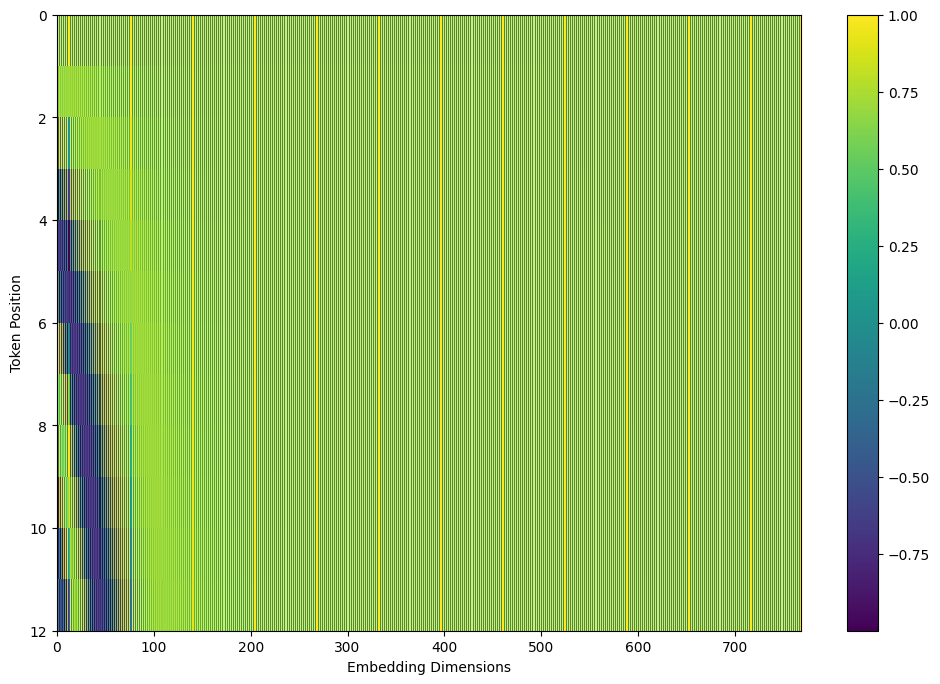

In [35]:
import matplotlib.pyplot as plt

def visualize_positional_encoding(pos_encoding):
    plt.figure(figsize=(12,8))
    plt.pcolormesh(pos_encoding, cmap='viridis')
    plt.xlabel('Embedding Dimensions')
    plt.xlim((0, d_model))
    plt.ylim((max_len,0))
    plt.ylabel('Token Position')
    plt.colorbar()
    plt.show()

visualize_positional_encoding(pos_encoding)

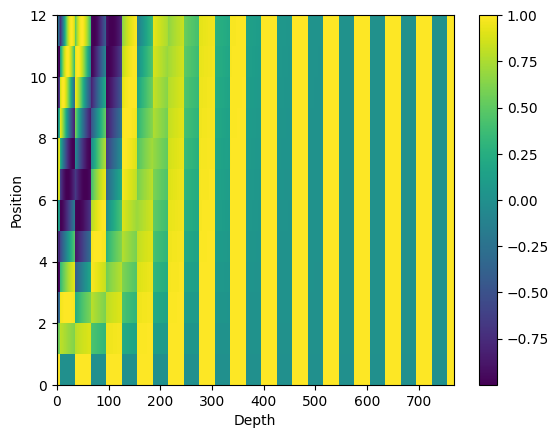

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import BertTokenizer

def get_positional_encodings(max_len, d_model):
    angle_rates = 1 / np.power(10000, (2 * (np.arange(d_model)[np.newaxis, :] // 2)) / np.float32(d_model))
    angle_rads = np.arange(max_len)[:, np.newaxis] * angle_rates

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return pos_encoding

def visualize_positional_encodings(pos_encodings):
    plt.pcolormesh(pos_encodings[0], cmap='viridis')
    plt.xlabel('Depth')
    plt.xlim((0, d_model))
    plt.ylabel('Position')
    plt.colorbar()
    plt.show()

# Sample document
document =  "this is an example document for the positional encoding"

# Load BERT tokenizer -  BERT-base-uncased
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the document
tokenized_document = tokenizer.encode(document, add_special_tokens=True)

max_len = len(tokenized_document)
d_model = 768

# Create positional encoding matrix
pos_encoding = get_positional_encodings(max_len, d_model)

# Visualize the positional encodings
visualize_positional_encodings(pos_encoding)